# Advanced data analysis and EDA+ML+Conclusion

In [452]:
import pandas as pd
import scipy as sc
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt      
import math
import seaborn as sns
from plotnine import *
from plotnine import ggplot
from collections import Counter
from sklearn.decomposition import PCA
%matplotlib inline

In [453]:

df = pd.read_csv("players_clean_1.csv")
#df.drop(columns='column_1',inplace=True)
dataset=df.copy()

## value-rating 

We would like to see the relationship between the value and the player rating

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


<AxesSubplot:xlabel='rating'>

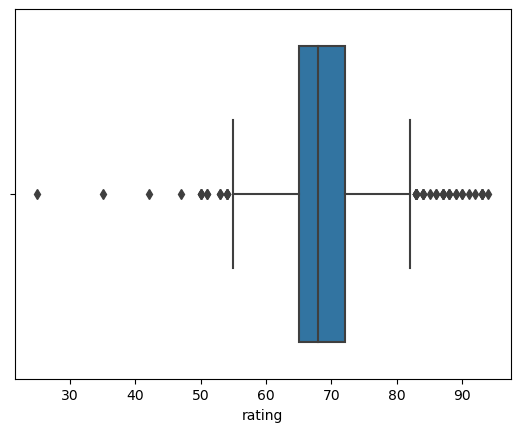

In [454]:
sns.boxplot(dataset.rating)

It can be seen that there are exceptions in the rating category

0.6437847350901619

<Figure size 5000x2000 with 0 Axes>

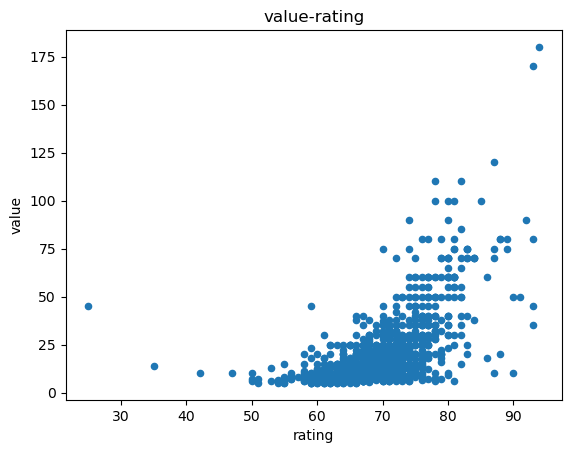

In [455]:
fig = plt.figure(figsize=(50,20))
dataset.loc[:,['rating','value']].plot(title='value-rating',x='rating',y='value',kind='scatter')

dataset['rating'].corr(dataset['value'])

It can be seen that there are exceptions in the category even between the ranking and the value.
We will handle these values

In [456]:
dataset=dataset.loc[dataset['rating']>55]
dataset=dataset.loc[dataset['value']<120]
#|(value > 85 & rating <85)|(value<80 & rating>90)|(value<60 & rating>85)

In [457]:
index_to_remove=[]
index_to_remove.append(dataset.query('(value > 30 & rating <60)|(value > 60 & rating <75)|(value > 80 & rating <80)|(value > 20 & rating <62)|(value>60 & rating<78)').index)
dataset.drop(index=index_to_remove[0].values,inplace=True)
dataset.reset_index(inplace=True,drop=True)

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


<AxesSubplot:xlabel='rating'>

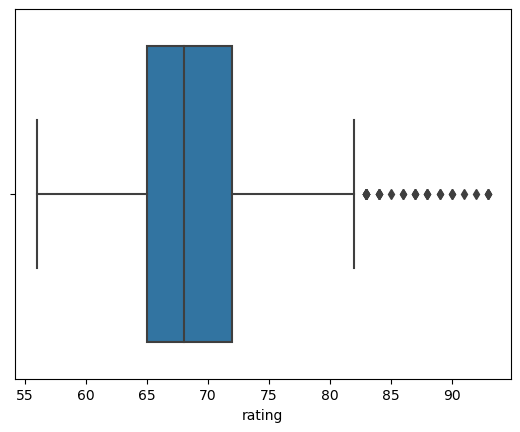

In [458]:
sns.boxplot(dataset.rating)

There is a significant improvement in exceptions

0.699369338336265

<Figure size 5000x2000 with 0 Axes>

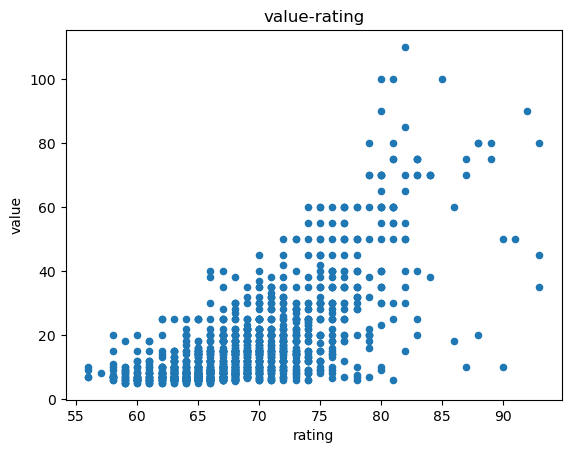

In [459]:
fig = plt.figure(figsize=(50,20))
dataset.loc[:,['rating','value']].plot(title='value-rating',x='rating',y='value',kind='scatter')
dataset['rating'].corr(dataset['value'])

## Age

We would like to see the relationship between age and value

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


0.013178610679876303

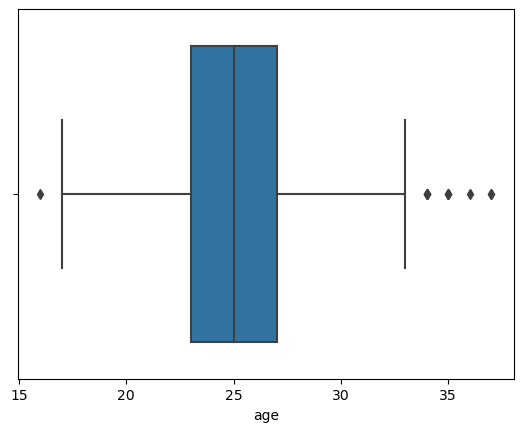

In [460]:
sns.boxplot(dataset.age)
dataset['age'].corr(dataset['value'])

In [461]:
#dataset=dataset.loc[dataset['age']>17]
#dataset=dataset.loc[dataset['age']<34]
#sns.boxplot(dataset.age)

#dataset['age'].corr(dataset['value'])

In [462]:
ages=dataset['age'].value_counts().keys()
#age_numbers=df2['age'].value_counts().values
age_mean=[]
for age in ages:
    age_mean.append(dataset.loc[dataset['age'] == age,['value']].mean().values[0])
df_age_mean=pd.DataFrame({'age':ages,'mean':age_mean})
df_age_mean=df_age_mean.sort_values(by='age',ascending=False)

<AxesSubplot:xlabel='age'>

<Figure size 5000x2000 with 0 Axes>

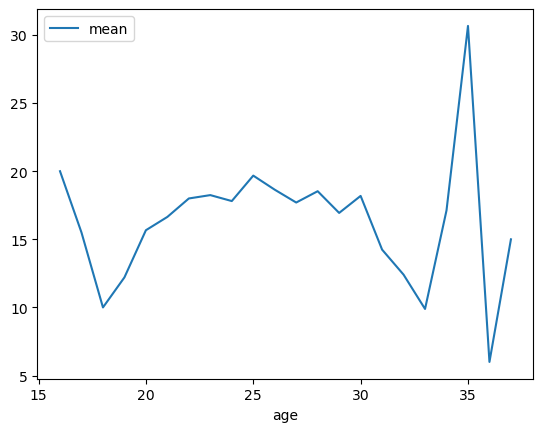

In [463]:
fig = plt.figure(figsize=(50,20))
df_age_mean.plot(x='age',y='mean',kind='line')

A certain distribution can be seen between the age and the average values.
We will divide into groups in order to handle exceptions and convenience for the continuation.

  age_binned       mean
0          5  17.837079
1          4  19.232899
2          2  16.919795
3          3  18.021324
4          6  14.052632
5          1  12.023810


<AxesSubplot:xlabel='age_binned'>

<Figure size 2000x1000 with 0 Axes>

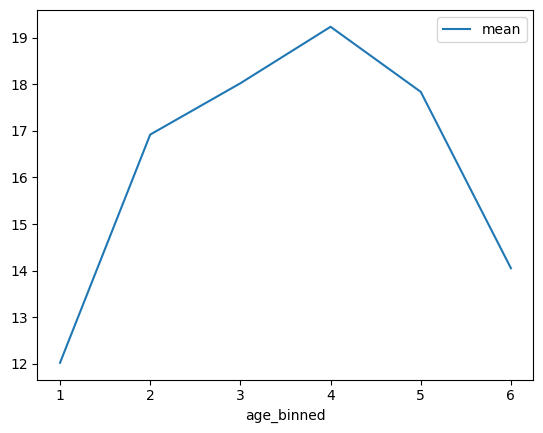

In [464]:
bins = [0,19,22,24,26,30,40]
labels =  [1,2,3,4,5,6]
dataset['age_binned'] = pd.cut(x = dataset['age'], bins = bins, labels = labels, include_lowest = True)
dataset.drop('age',inplace=True,axis=1)
ages=dataset['age_binned'].value_counts().keys()
#age_numbers=df2['age'].value_counts().values
age_mean=[]
for age in ages:
    age_mean.append(dataset.loc[dataset['age_binned'] == age,['value']].mean().values[0])
df_age_mean=pd.DataFrame({'age_binned':ages,'mean':age_mean})
df_age_mean.sort_values(by='mean',ascending=False)
print(df_age_mean)
fig = plt.figure(figsize=(20,10))
df_age_mean.sort_values(by='age_binned',ascending=True).plot(x='age_binned',kind='line')


Now the distribution is clear, a player is defined as more valuable when he is in the 22-30 age range.
These are the years when the actor's body and ability are at their peak

In [465]:
dataset['age_binned'].corr(dataset['value'])

0.019761535270575704

# NATIONS
In this step we want to check the effect of the player's country on his value.

<AxesSubplot:ylabel='Frequency'>

<Figure size 2000x1000 with 0 Axes>

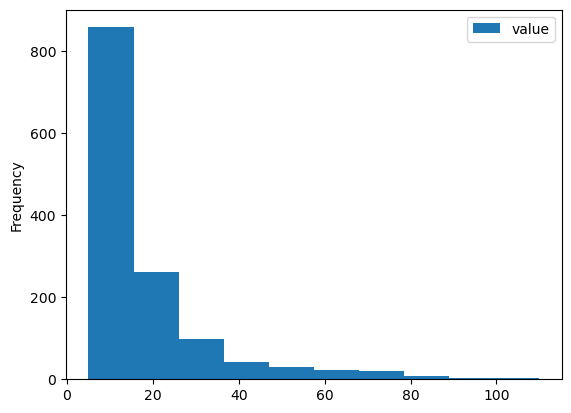

In [466]:
fig = plt.figure(figsize=(20,10))
dataset.plot(x='nation',y='value',kind='hist')

In [467]:
nations_1=dataset['nation'].value_counts().keys()
numbers_1=dataset['nation'].value_counts().values
nations_mean_1=[]
for nation in nations_1:
    nations_mean_1.append(dataset.loc[dataset['nation']==nation,['value']].mean().values[0])
df_nations_mean_1=pd.DataFrame({'nation':nations_1,'numbers_of_players':numbers_1,'mean':nations_mean_1})
df_nations_mean_1.sort_values(by='mean',ascending=False)
df_nations_mean_1

,nation,numbers_of_players,mean
0,England,136,22.533088
1,France,125,21.084000
2,Brazil,121,15.800000
3,Spain,114,17.276316
4,Germany,65,18.938462
...,...,...,...
79,Georgia,1,60.000000
80,New Zealand,1,10.000000
81,Zambia,1,20.000000
82,The Gambia,1,12.000000


<AxesSubplot:ylabel='Frequency'>

<Figure size 2000x1000 with 0 Axes>

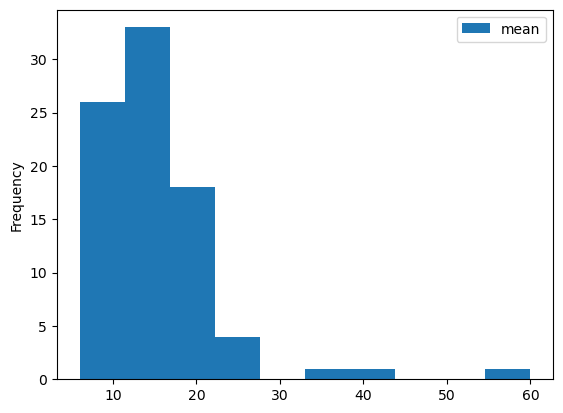

In [468]:
fig = plt.figure(figsize=(20,10))
df_nations_mean_1.plot(x='nation',y='mean',kind='hist')

In [469]:
df_nations_mean_1.loc[df_nations_mean_1['mean']>=30]

,nation,numbers_of_players,mean
52,Slovakia,3,34.166667
56,"Korea, South",2,41.000000
79,Georgia,1,60.000000


we found some countries that maybe have outliers
Slovakia, Korea South ,Georgia.


These countries send few players to our list (the list consists of the best players in the world)
Therefore countries that send few high value players can mislead our model later on and we would like to address them

In [470]:
dataset.loc[dataset['nation']=='Georgia']

,value,name,club,nation,position,Corners,Crossing,Dribbling,Finishing,First Touch,...,Jumping Reach,Natural Fitness,Pace,Stamina,Strength,rating,Foot,Length,Weight,age_binned
15,60.0,Khvicha Kvaratskhelia,SSC Napoli,Georgia,Left Winger,8,12,18,15,17,...,10,16,14,13,10,77,Right,183,70.0,2


In [471]:
dataset.loc[dataset['nation']=='Slovakia']

,value,name,club,nation,position,Corners,Crossing,Dribbling,Finishing,First Touch,...,Jumping Reach,Natural Fitness,Pace,Stamina,Strength,rating,Foot,Length,Weight,age_binned
527,30.0,Stanislav Lobotka,SSC Napoli,Slovakia,Defensive Midfield,4,11,14,6,17,...,7,15,12,15,10,75,Right,172,64.0,5
911,60.0,Milan Skriniar,Inter Milan,Slovakia,Centre-Back,4,7,9,10,10,...,16,18,15,16,18,81,Right,188,82.0,5
1096,12.5,David Hancko,Feyenoord Rotterdam,Slovakia,Centre-Back,9,13,14,11,11,...,15,10,12,14,12,68,Left,188,79.0,4


In [472]:
dataset.loc[dataset['nation']=='Korea, South']

,value,name,club,nation,position,Corners,Crossing,Dribbling,Finishing,First Touch,...,Jumping Reach,Natural Fitness,Pace,Stamina,Strength,rating,Foot,Length,Weight,age_binned
12,70.0,Heung-min Son,Tottenham Hotspur,"Korea, South",Left Winger,14,14,16,18,13,...,10,16,16,16,10,87,Both,183,77.0,5
683,12.0,Kang-in Lee,RCD Mallorca,"Korea, South",Attacking Midfield,12,12,14,13,14,...,8,12,12,11,10,65,Left,173,68.0,2


In [473]:
dataset.drop(index=[15,911,12],inplace=True)
dataset.reset_index(inplace=True,drop=True)


We will divide the countries into categories according to the representatives they send.
This is how we will determine who is a leading country in the field

In [474]:
bins = [0,15,30,300]
labels = [1,2,3]
nations_binned = pd.cut(dataset['nation'].value_counts(), bins, labels=labels)
print(nations_binned)
dataset['nations_binned']=dataset['nation'].map(nations_binned)
dataset.drop(columns='nation',inplace=True)
dataset

England        3
France         3
Brazil         3
Spain          3
Germany        3
              ..
Uzbekistan     1
Suriname       1
New Zealand    1
The Gambia     1
Australia      1
Name: nation, Length: 83, dtype: category
Categories (3, int64): [1 < 2 < 3]


,value,name,club,position,Corners,Crossing,Dribbling,Finishing,First Touch,Free Kick Taking,...,Natural Fitness,Pace,Stamina,Strength,rating,Foot,Length,Weight,age_binned,nations_binned
0,90.0,Harry Kane,Tottenham Hotspur,Centre-Forward,9,15,14,19,15,10,...,16,14,16,15,92,Both,188,86.0,5,3
1,85.0,Rafael Leão,AC Milan,Left Winger,5,15,17,15,16,6,...,15,16,11,14,82,Right,188,81.0,3,3
2,80.0,Christopher Nkunku,RB Leipzig,Second Striker,14,13,14,14,14,14,...,14,15,16,11,79,Right,175,73.0,4,3
3,80.0,Mohamed Salah,Liverpool FC,Right Winger,12,14,17,17,17,12,...,17,18,15,15,93,Left,175,72.0,5,1
4,75.0,Luis Díaz,Liverpool FC,Left Winger,9,12,18,15,18,10,...,15,16,13,10,83,Right,180,70.0,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1338,5.0,Federico Gatti,Juventus FC,Centre-Back,7,7,8,10,10,7,...,14,13,14,15,65,Right,190,84.0,3,3
1339,5.0,Adrià Pedrosa,RCD Espanyol Barcelona,Left-Back,7,9,14,6,11,2,...,10,15,13,10,66,Left,176,69.0,3,3
1340,5.0,Joaquín Piquerez,Sociedade Esportiva Palmeiras,Left-Back,11,12,12,10,13,12,...,13,13,13,14,66,Left,183,81.0,3,2
1341,5.0,Nicolas Cozza,Montpellier HSC,Left-Back,9,11,11,8,13,7,...,13,12,14,13,63,Left,178,72.0,3,3


In [475]:
dataset['nations_binned'].corr(dataset['value'])

0.12963942011334867


It can be seen that there is an effect (low but present)
Between the nationality and the value of the player

# clubs

In this step we want to check the effect of the player's club on his value.


<AxesSubplot:ylabel='Frequency'>

<Figure size 2000x1000 with 0 Axes>

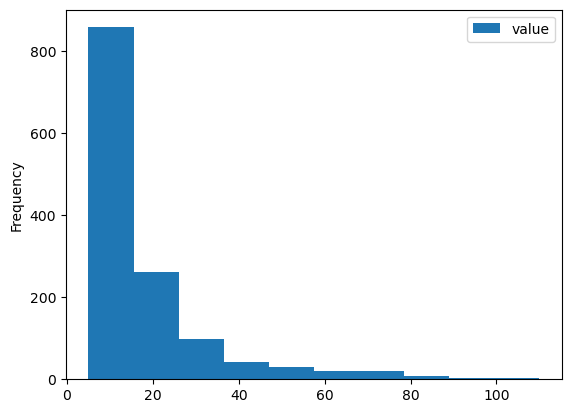

In [476]:
fig = plt.figure(figsize=(20,10))
dataset.plot(x='club',y='value',kind='hist')

In [477]:
clubs=dataset['club'].value_counts().keys()
numbers=dataset['club'].value_counts().values
clubs_mean=[]
for club in clubs:
    clubs_mean.append(dataset.loc[dataset['club'] == club,['value']].mean().values[0])
df_clubs_mean=pd.DataFrame({'club':clubs,'num':numbers,'mean':clubs_mean})
df_clubs_mean.sort_values(by='mean',ascending=False)

,club,num,mean
22,Manchester City,16,48.625000
14,Bayern Munich,17,47.588235
21,Liverpool FC,16,41.312500
9,FC Barcelona,17,38.705882
4,Chelsea FC,19,37.368421
...,...,...,...
162,Santos Laguna,2,5.500000
170,Real Zaragoza,1,5.000000
167,Millwall FC,1,5.000000
169,FC Schalke 04,1,5.000000


<AxesSubplot:ylabel='Frequency'>

<Figure size 2000x1000 with 0 Axes>

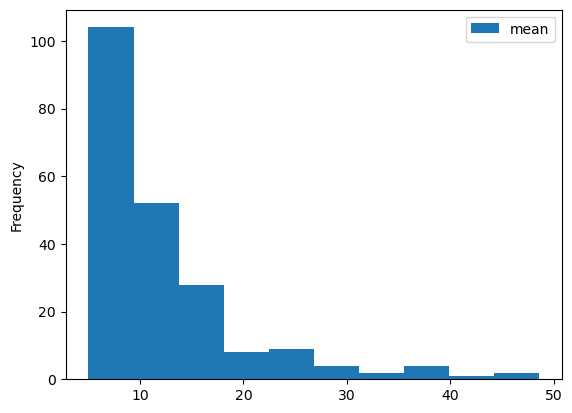

In [478]:
fig = plt.figure(figsize=(20,10))
df_clubs_mean.plot(x='club',y='mean',kind='hist')

In this case too, we will divide according to the number of shows of each group.
Top team - a team that sends a lot of players to the list

In [479]:
bins = [0,5,15,30]
labels = [1,2,3]
clubs_binned = pd.cut(dataset['club'].value_counts(), bins=bins, labels=labels, include_lowest = True)
print(clubs_binned)
dataset['clubs_binned']=dataset['club'].map(clubs_binned)
dataset.drop(columns='club',inplace=True)
dataset

AC Milan                  3
AS Monaco                 3
Brighton & Hove Albion    3
Everton FC                3
Chelsea FC                3
                         ..
Club Atlético Talleres    1
Adana Demirspor           1
Granada CF                1
New York Red Bulls        1
FC Luzern                 1
Name: club, Length: 214, dtype: category
Categories (3, int64): [1 < 2 < 3]


,value,name,position,Corners,Crossing,Dribbling,Finishing,First Touch,Free Kick Taking,Heading,...,Pace,Stamina,Strength,rating,Foot,Length,Weight,age_binned,nations_binned,clubs_binned
0,90.0,Harry Kane,Centre-Forward,9,15,14,19,15,10,15,...,14,16,15,92,Both,188,86.0,5,3,3
1,85.0,Rafael Leão,Left Winger,5,15,17,15,16,6,11,...,16,11,14,82,Right,188,81.0,3,3,3
2,80.0,Christopher Nkunku,Second Striker,14,13,14,14,14,14,6,...,15,16,11,79,Right,175,73.0,4,3,3
3,80.0,Mohamed Salah,Right Winger,12,14,17,17,17,12,10,...,18,15,15,93,Left,175,72.0,5,1,3
4,75.0,Luis Díaz,Left Winger,9,12,18,15,18,10,13,...,16,13,10,83,Right,180,70.0,4,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1338,5.0,Federico Gatti,Centre-Back,7,7,8,10,10,7,15,...,13,14,15,65,Right,190,84.0,3,3,2
1339,5.0,Adrià Pedrosa,Left-Back,7,9,14,6,11,2,12,...,15,13,10,66,Left,176,69.0,3,3,2
1340,5.0,Joaquín Piquerez,Left-Back,11,12,12,10,13,12,12,...,13,13,14,66,Left,183,81.0,3,2,2
1341,5.0,Nicolas Cozza,Left-Back,9,11,11,8,13,7,12,...,12,14,13,63,Left,178,72.0,3,3,1


In [480]:
dataset.dropna(inplace=True)
dataset.reset_index(inplace=True,drop=True)
dataset

,value,name,position,Corners,Crossing,Dribbling,Finishing,First Touch,Free Kick Taking,Heading,...,Pace,Stamina,Strength,rating,Foot,Length,Weight,age_binned,nations_binned,clubs_binned
0,90.0,Harry Kane,Centre-Forward,9,15,14,19,15,10,15,...,14,16,15,92,Both,188,86.0,5,3,3
1,85.0,Rafael Leão,Left Winger,5,15,17,15,16,6,11,...,16,11,14,82,Right,188,81.0,3,3,3
2,80.0,Christopher Nkunku,Second Striker,14,13,14,14,14,14,6,...,15,16,11,79,Right,175,73.0,4,3,3
3,80.0,Mohamed Salah,Right Winger,12,14,17,17,17,12,10,...,18,15,15,93,Left,175,72.0,5,1,3
4,75.0,Luis Díaz,Left Winger,9,12,18,15,18,10,13,...,16,13,10,83,Right,180,70.0,4,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1338,5.0,Federico Gatti,Centre-Back,7,7,8,10,10,7,15,...,13,14,15,65,Right,190,84.0,3,3,2
1339,5.0,Adrià Pedrosa,Left-Back,7,9,14,6,11,2,12,...,15,13,10,66,Left,176,69.0,3,3,2
1340,5.0,Joaquín Piquerez,Left-Back,11,12,12,10,13,12,12,...,13,13,14,66,Left,183,81.0,3,2,2
1341,5.0,Nicolas Cozza,Left-Back,9,11,11,8,13,7,12,...,12,14,13,63,Left,178,72.0,3,3,1


In [481]:
clubs=dataset['clubs_binned'].value_counts().keys()
numbers=dataset['clubs_binned'].value_counts().values
clubs_mean=[]
for club in clubs:
    clubs_mean.append(dataset.loc[dataset['clubs_binned'] == club,['value']].mean().values[0])
df_clubs_mean=pd.DataFrame({'clubs_binned':clubs,'num':numbers,'mean':clubs_mean})
df_clubs_mean.sort_values(by='mean',ascending=False)

,clubs_binned,num,mean
1,3,399,26.275689
0,2,641,16.157254
2,1,303,8.765677


In [482]:
dataset['clubs_binned'].corr(dataset['value'])

0.42192079533901516

You can see a relatively significant relationship between the team the player plays in and his value.
This aligns with reality.

## position

In [483]:
positions=dataset['position'].value_counts().keys()
positions_mean=[]
for position in positions:
    positions_mean.append(dataset.loc[dataset['position'] == position,['value']].mean().values[0])
df_position_mean=pd.DataFrame({'position':positions,'mean':positions_mean})
df_position_mean.sort_values(by='mean')

,position,mean
7,Right-Back,14.695000
8,Left-Back,15.436735
10,Left Midfield,15.538462
1,Centre-Forward,16.272500
0,Centre-Back,16.598000
5,Right Winger,17.309091
2,Central Midfield,17.772959
6,Attacking Midfield,19.509174
4,Defensive Midfield,19.762712
3,Left Winger,19.916000


<AxesSubplot:xlabel='position'>

<Figure size 10000x3000 with 0 Axes>

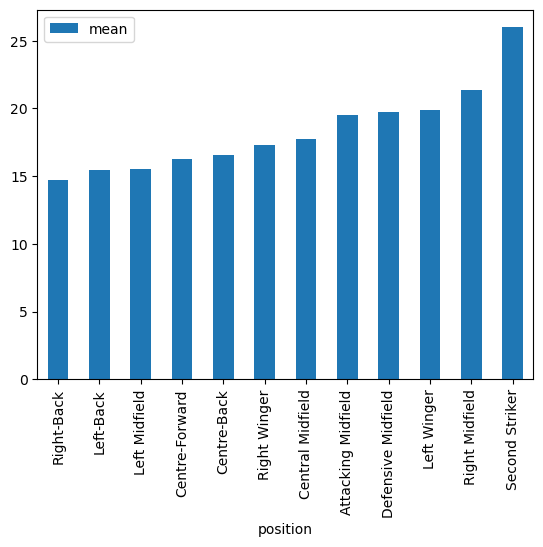

In [484]:
fig = plt.figure(figsize=(100,30))
df_position_mean.sort_values(by='mean').plot(x='position',kind='bar')

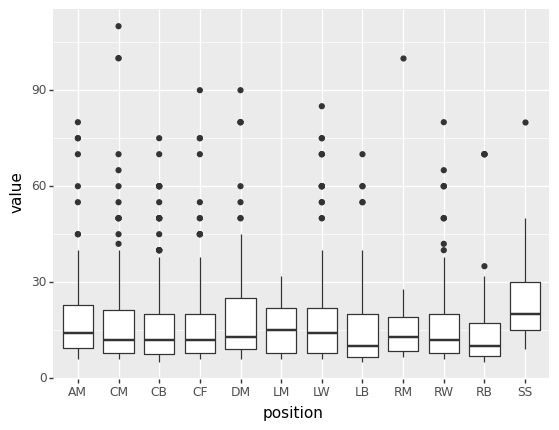

<ggplot: (147879757204)>

In [485]:
dataset['position'] = dataset['position'].astype('category')
dataset['position'] = dataset['position'].cat.rename_categories({'Second Striker':'SS', 'Left Winger':'LW','Attacking Midfield':'AM',
                                                        'Defensive Midfield':'DM','Right Winger':'RW','Central Midfield':'CM',
                                                        'Centre-Back':'CB','Centre-Forward':'CF','Left Midfield':'LM','Left-Back':'LB',
                                                        'Right-Back':'RB','Right Midfield':'RM'})
ggplot(dataset,aes(x='position', y='value')) + \
geom_boxplot()

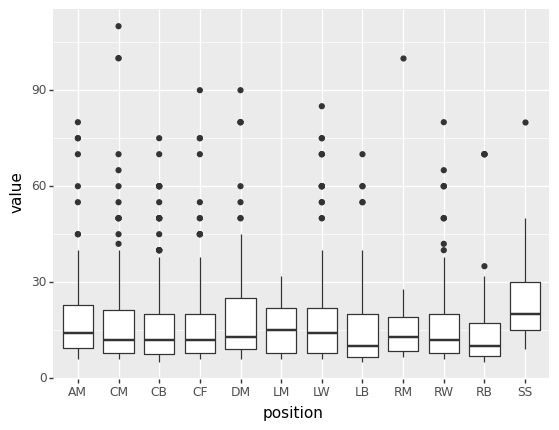

<ggplot: (147880904831)>

In [486]:
dataset['position'] = dataset['position'].astype('category')
dataset['position'] = dataset['position'].cat.rename_categories({'Second Striker':'SS', 'Left Winger':'LW','Attacking Midfield':'AM',
                                                        'Defensive Midfield':'DM','Right Winger':'RW','Central Midfield':'CM',
                                                        'Centre-Back':'CB','Centre-Forward':'CF','Left Midfield':'LM','Left-Back':'LB',
                                                        'Right-Back':'RB','Right Midfield':'RM'})
ggplot(dataset,aes(x='position', y='value')) + \
geom_boxplot()

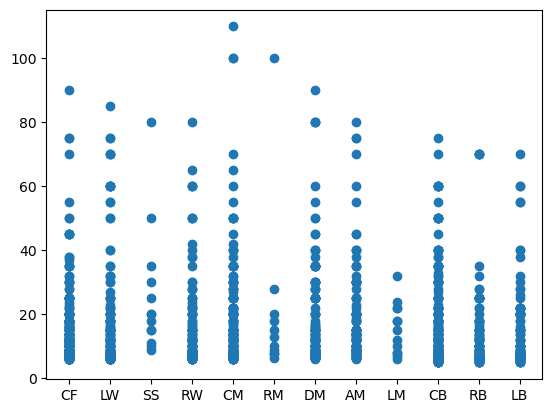

In [487]:
plt.scatter(dataset.position,dataset.value)

We chose to divide the player's positions into groups according to the position on the field.
strikers-5
Wings-4
Midfield-3
side defenders-2
center backs-1

In [488]:
dataset['position'].replace(['CB','CF','CM','LW','DM','AM','LB','RB','RW','LM','RM','SS'],[1,5,3,4,3,3,2,2,4,3,3,4],inplace=True)
dataset

,value,name,position,Corners,Crossing,Dribbling,Finishing,First Touch,Free Kick Taking,Heading,...,Pace,Stamina,Strength,rating,Foot,Length,Weight,age_binned,nations_binned,clubs_binned
0,90.0,Harry Kane,5,9,15,14,19,15,10,15,...,14,16,15,92,Both,188,86.0,5,3,3
1,85.0,Rafael Leão,4,5,15,17,15,16,6,11,...,16,11,14,82,Right,188,81.0,3,3,3
2,80.0,Christopher Nkunku,4,14,13,14,14,14,14,6,...,15,16,11,79,Right,175,73.0,4,3,3
3,80.0,Mohamed Salah,4,12,14,17,17,17,12,10,...,18,15,15,93,Left,175,72.0,5,1,3
4,75.0,Luis Díaz,4,9,12,18,15,18,10,13,...,16,13,10,83,Right,180,70.0,4,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1338,5.0,Federico Gatti,1,7,7,8,10,10,7,15,...,13,14,15,65,Right,190,84.0,3,3,2
1339,5.0,Adrià Pedrosa,2,7,9,14,6,11,2,12,...,15,13,10,66,Left,176,69.0,3,3,2
1340,5.0,Joaquín Piquerez,2,11,12,12,10,13,12,12,...,13,13,14,66,Left,183,81.0,3,2,2
1341,5.0,Nicolas Cozza,2,9,11,11,8,13,7,12,...,12,14,13,63,Left,178,72.0,3,3,1


In [489]:
dataset['position']=dataset['position'].astype('float')

# Correlation..

Now we would like to identify significant relationships.
We will discuss the attributs of each player

<AxesSubplot:>

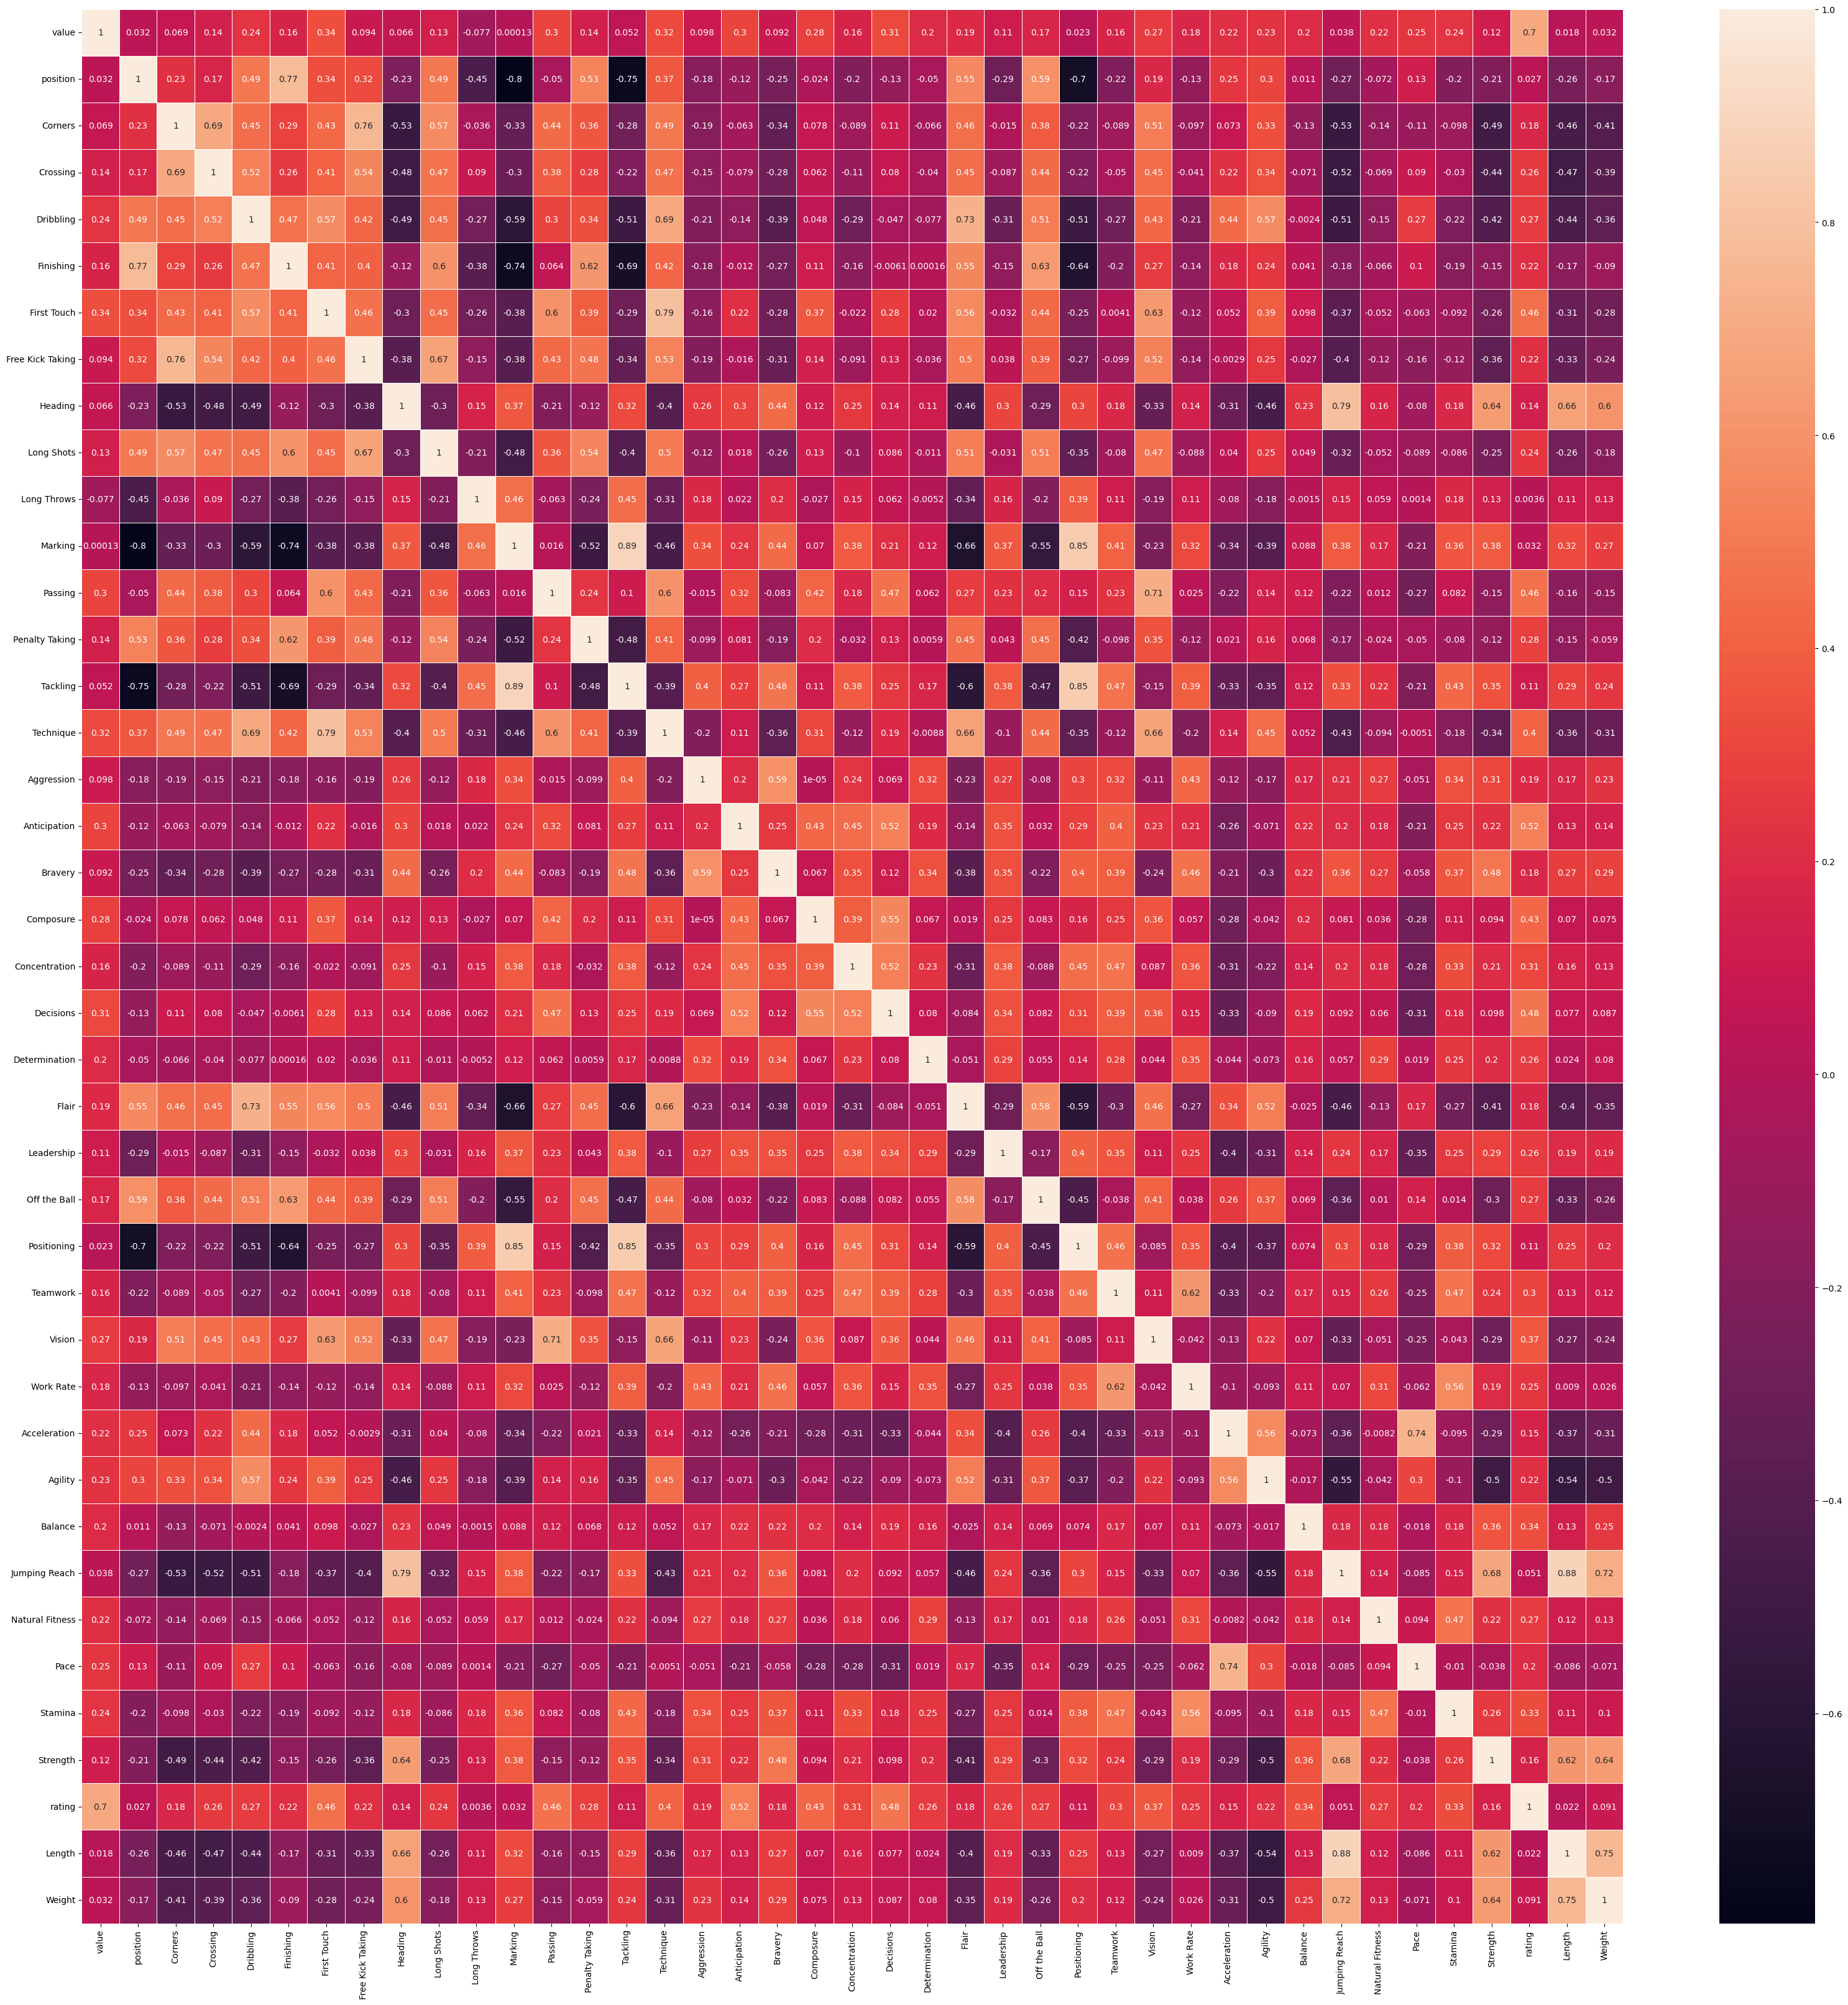

In [490]:
corr=dataset.corr(method ='pearson')

fig, ax = plt.subplots(figsize=(40,40))         # Sample figsize in inches
sns.heatmap(corr, annot=True, linewidths=.5, ax=ax)

<AxesSubplot:>

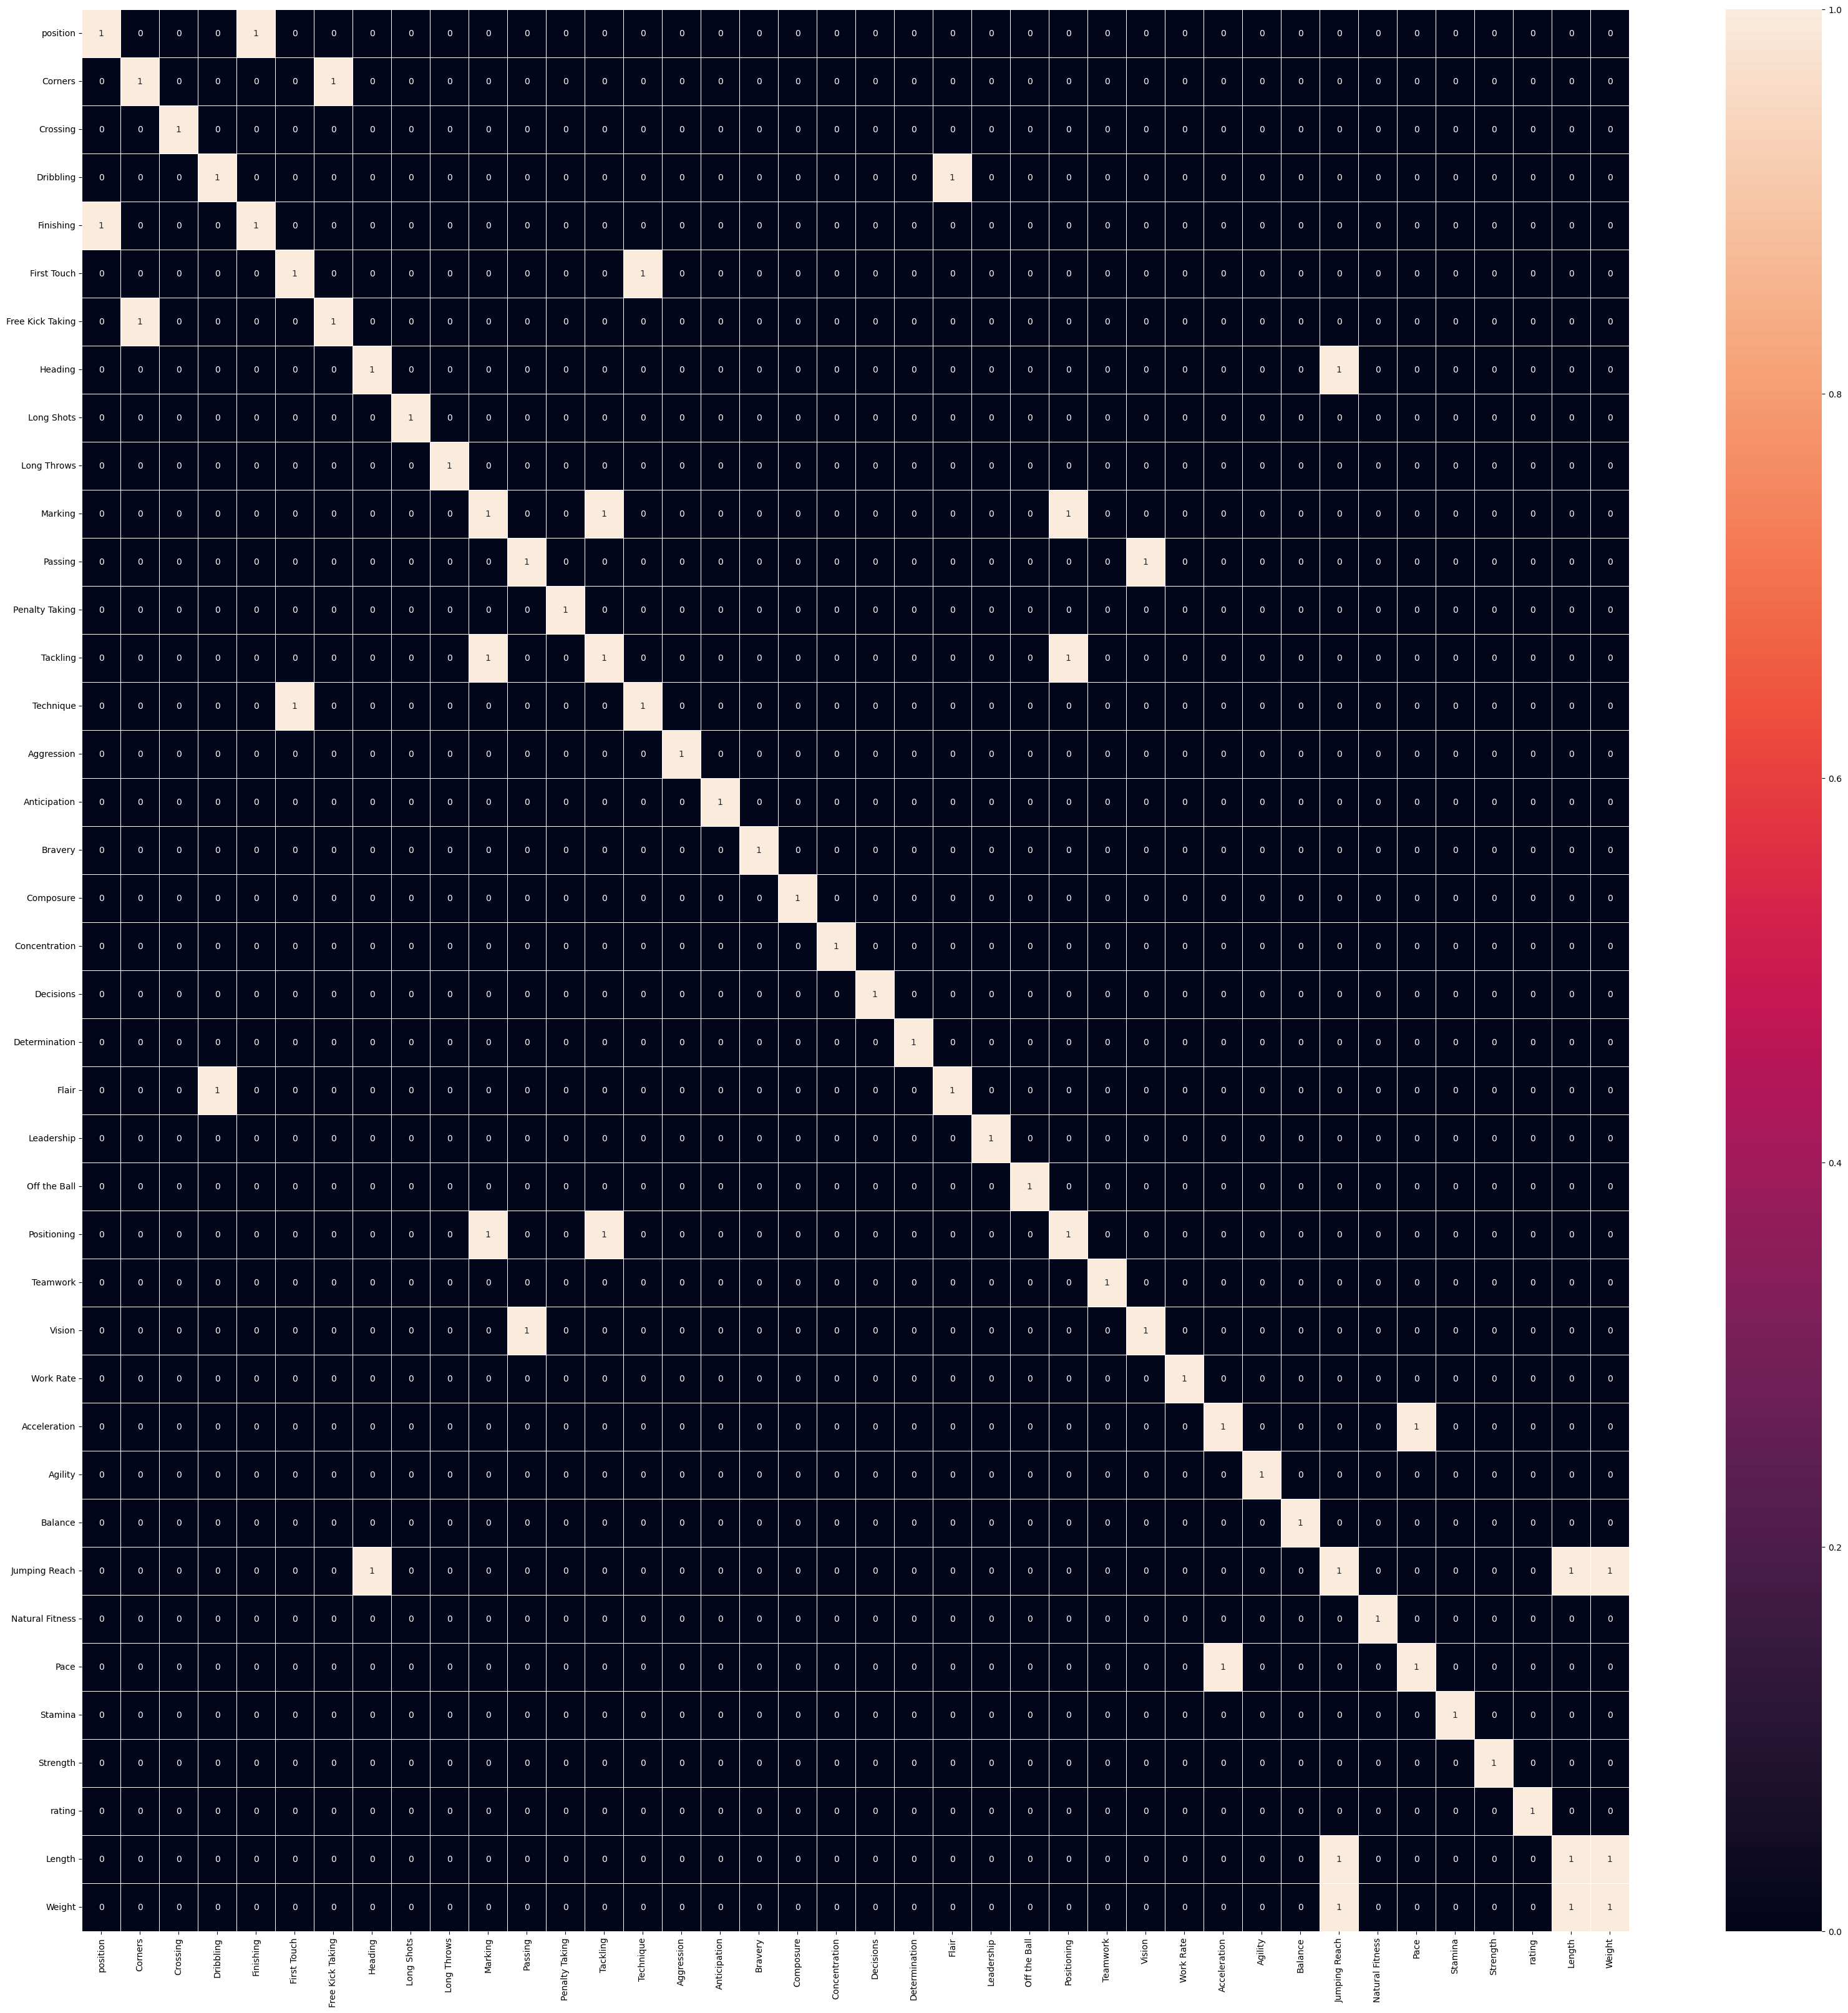

In [491]:
corr=dataset.iloc[:,2:].corr(method ='pearson')

fig, ax = plt.subplots(figsize=(40,40))         # Sample figsize in inches
sns.heatmap(corr>=0.7, annot=True, linewidths=.5, ax=ax)

<AxesSubplot:>

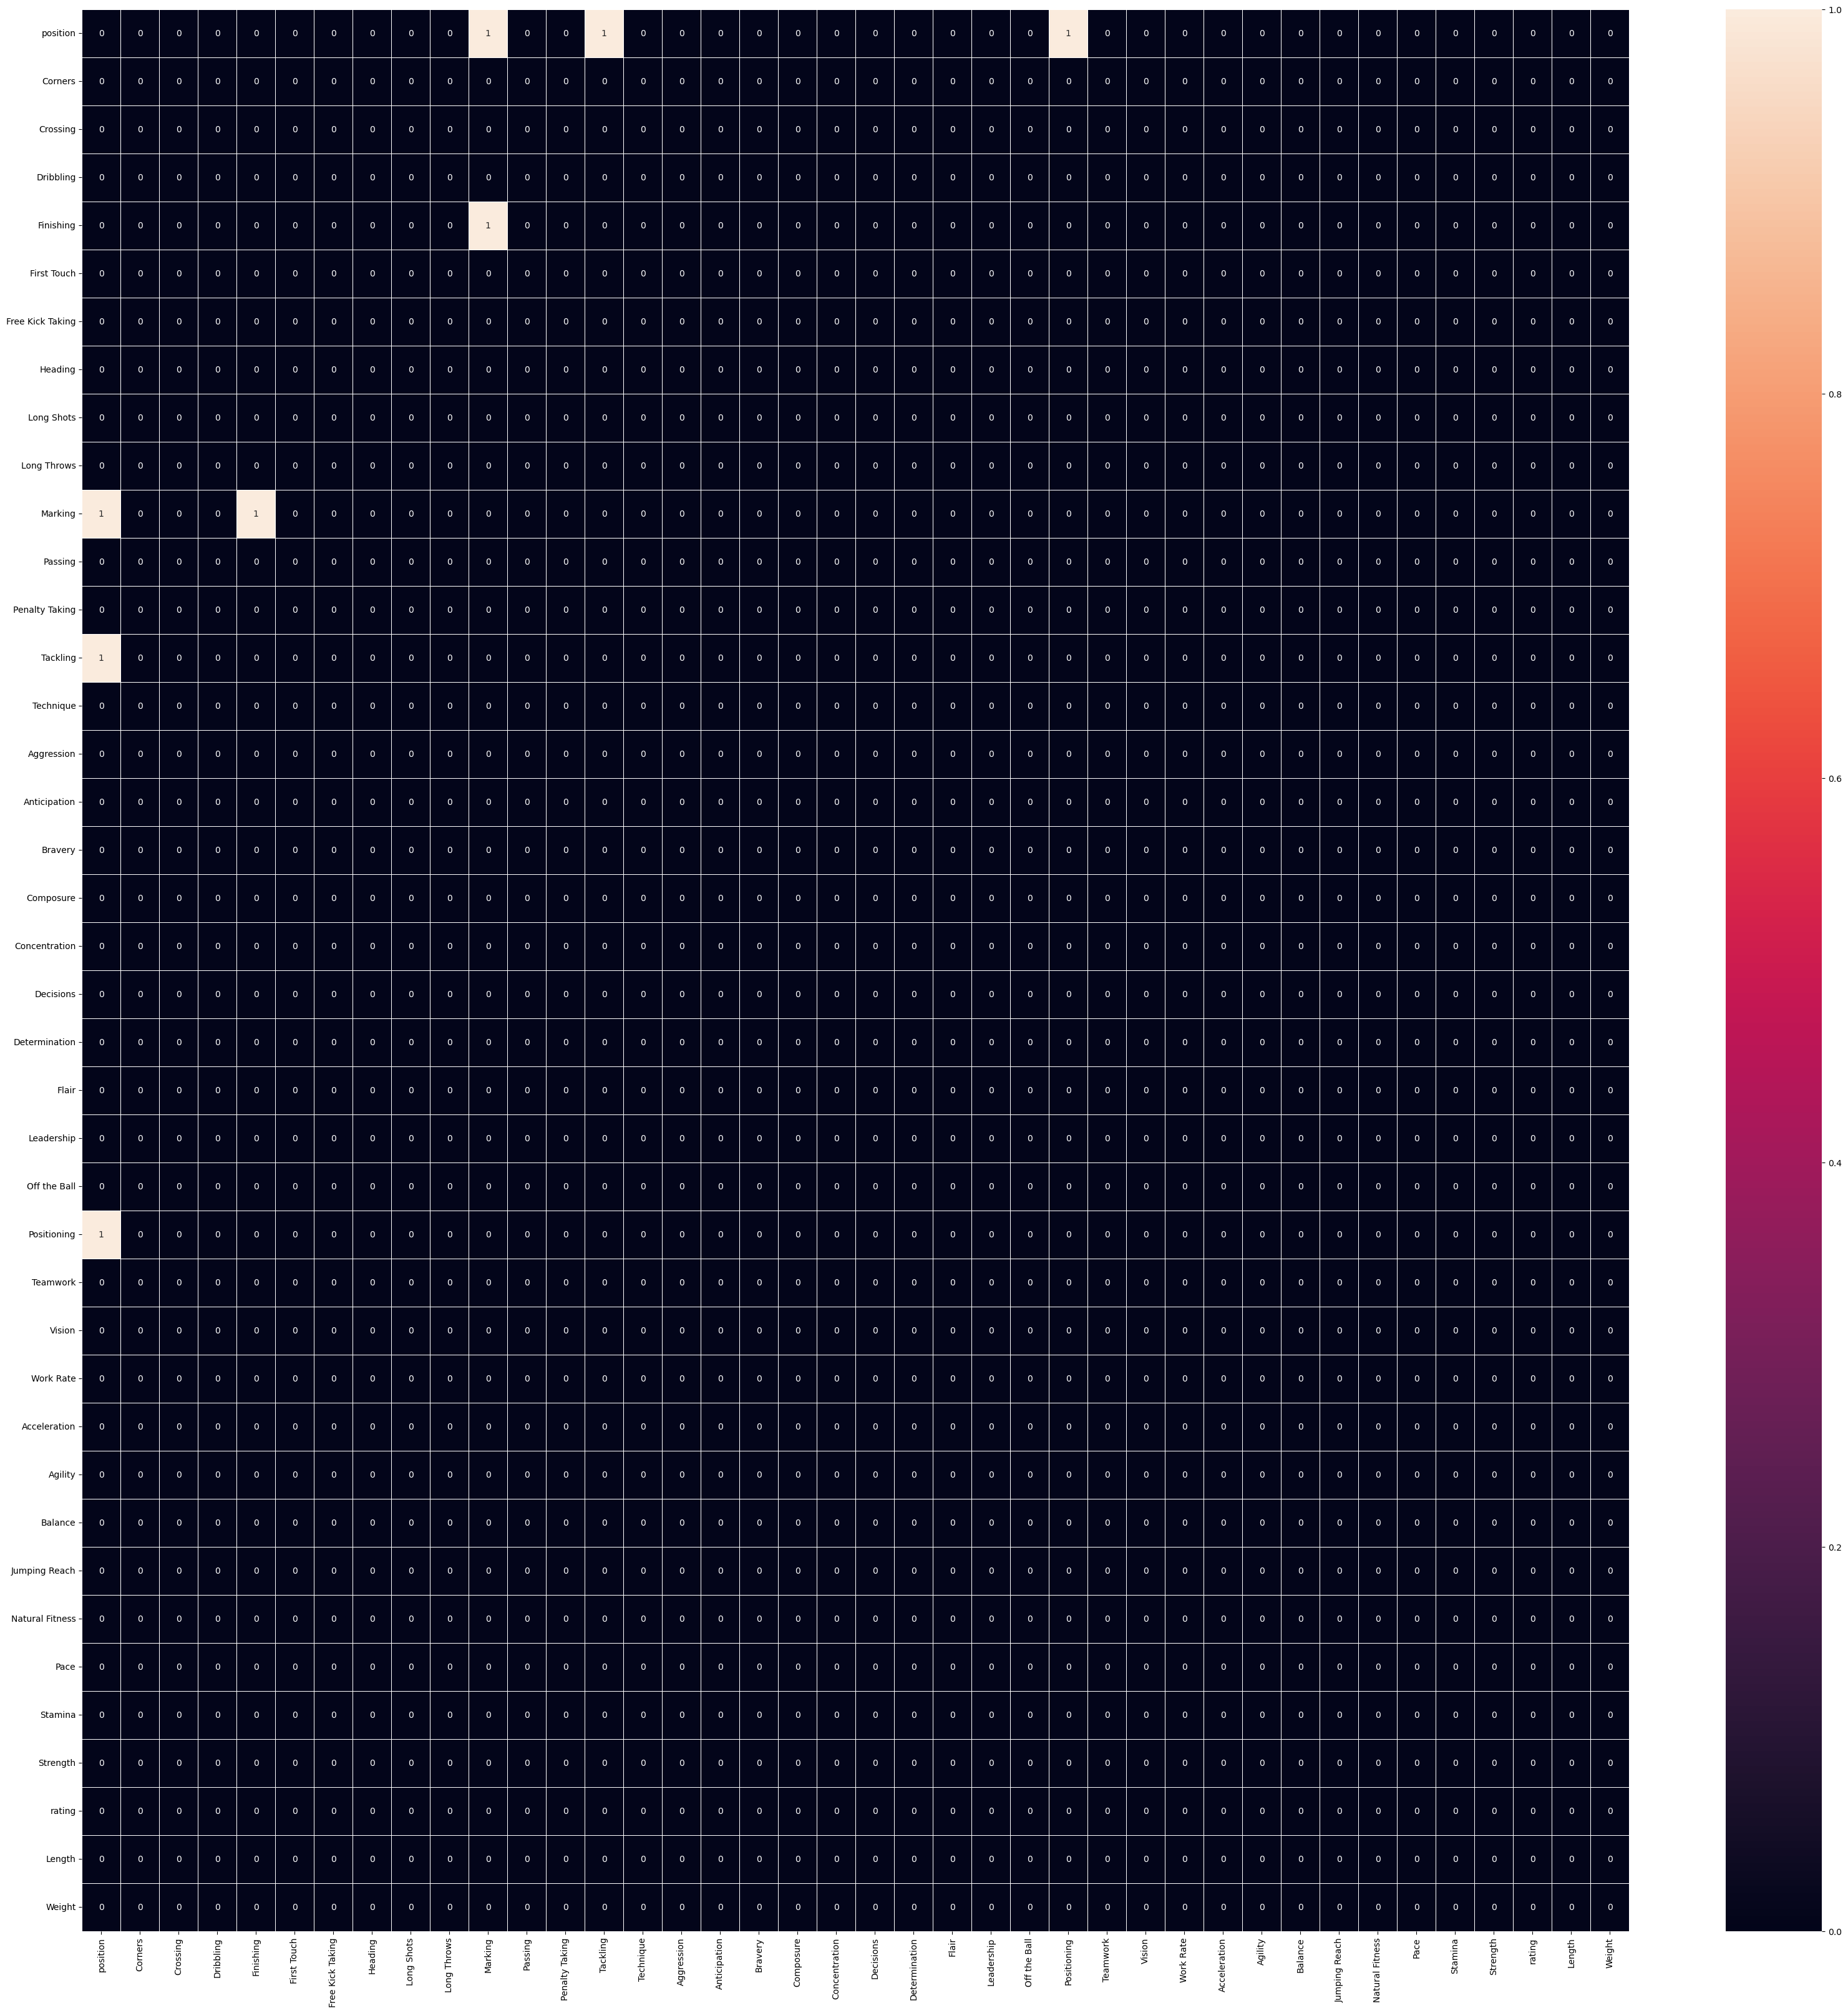

In [492]:
corr=dataset.iloc[:,2:].corr(method ='pearson')

fig, ax = plt.subplots(figsize=(40,40))         # Sample figsize in inches
sns.heatmap(corr<=-0.7, annot=True, linewidths=.5, ax=ax)

We will reduce to small graphs between which we see a connection

<AxesSubplot:>

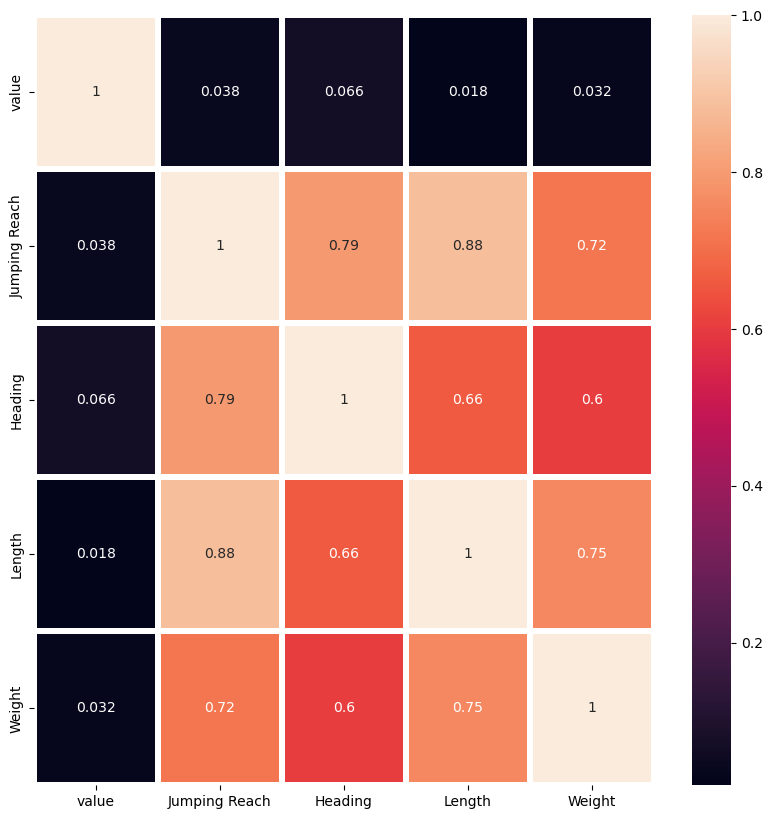

In [493]:
corr=dataset[['value','Jumping Reach','Heading','Length','Weight']].corr(method ='pearson')

fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches
sns.heatmap(corr, annot=True, linewidths=4, ax=ax)

<AxesSubplot:>

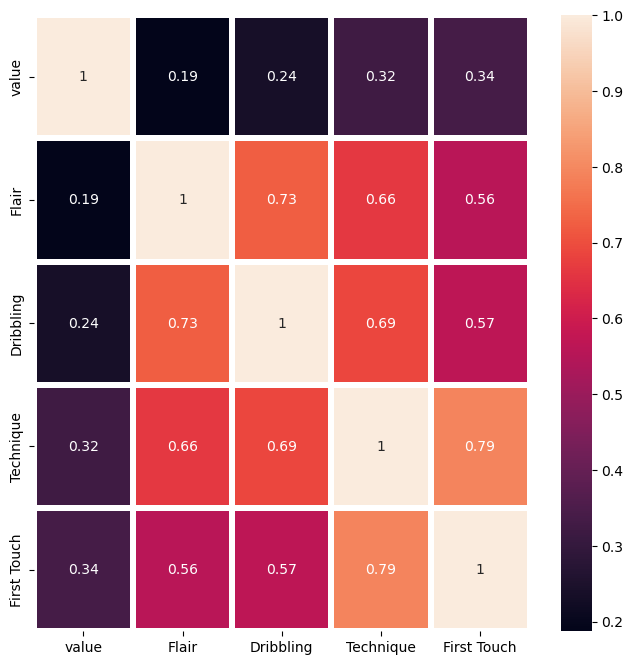

In [494]:
corr=dataset[['value','Flair','Dribbling','Technique','First Touch']].corr(method ='pearson')

fig, ax = plt.subplots(figsize=(8,8))         # Sample figsize in inches
sns.heatmap(corr, annot=True, linewidths=4, ax=ax)

<AxesSubplot:>

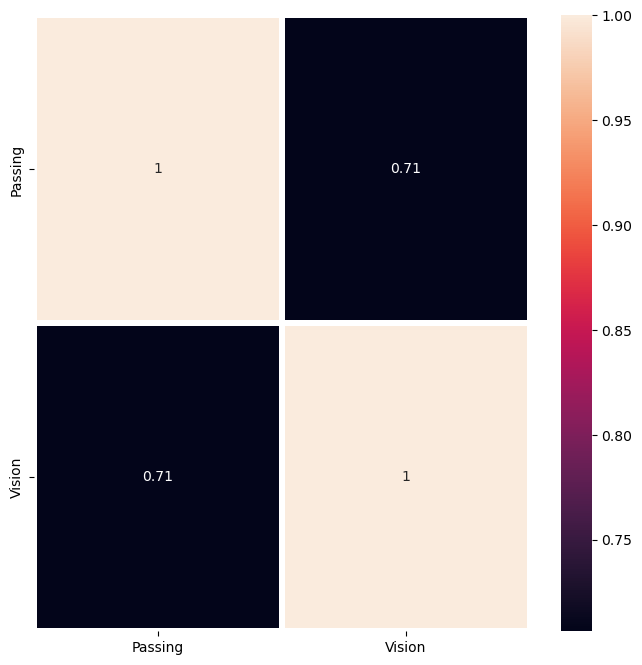

In [495]:
corr=dataset[['Passing','Vision']].corr(method ='pearson')

fig, ax = plt.subplots(figsize=(8,8))         # Sample figsize in inches
sns.heatmap(corr, annot=True, linewidths=4, ax=ax)

<AxesSubplot:>

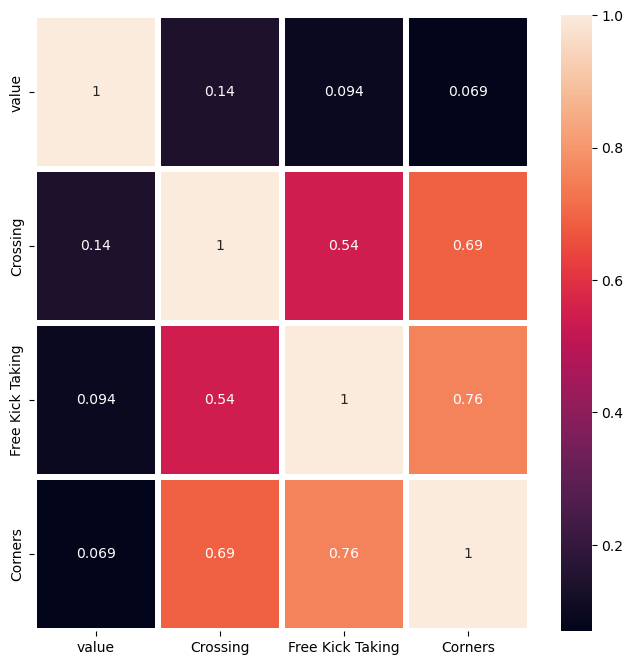

In [496]:
corr=dataset[['value','Crossing','Free Kick Taking','Corners']].corr(method ='pearson')

fig, ax = plt.subplots(figsize=(8,8))         # Sample figsize in inches
sns.heatmap(corr, annot=True, linewidths=4, ax=ax)

<AxesSubplot:>

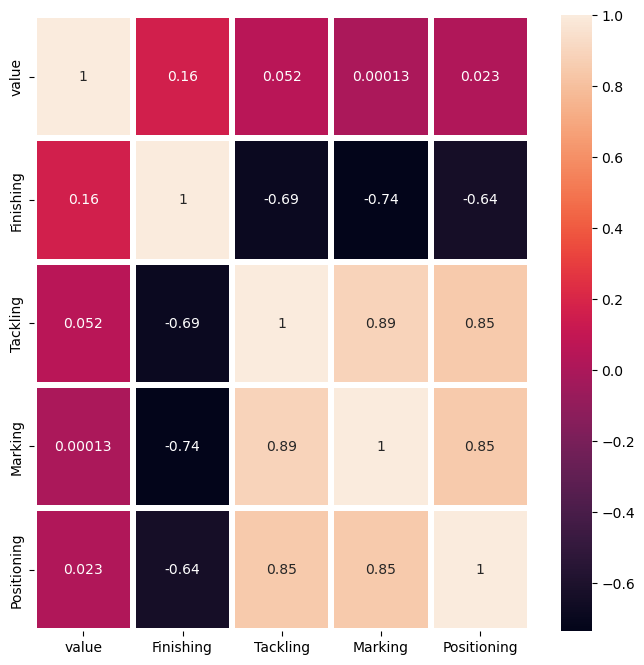

In [497]:
corr=dataset[['value','Finishing','Tackling','Marking','Positioning']].corr(method ='pearson')

fig, ax = plt.subplots(figsize=(8,8))         # Sample figsize in inches
sns.heatmap(corr, annot=True, linewidths=4, ax=ax)

<AxesSubplot:>

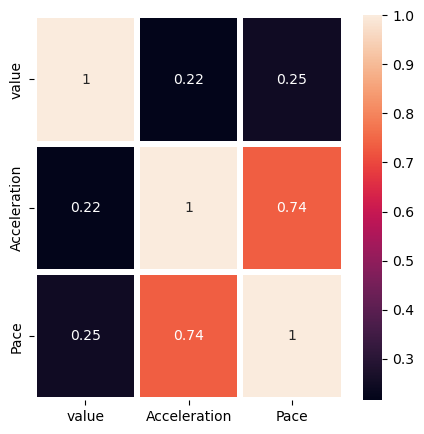

In [498]:
corr=dataset[['value','Acceleration','Pace']].corr(method ='pearson')

fig, ax = plt.subplots(figsize=(5,5))         # Sample figsize in inches
sns.heatmap(corr, annot=True, linewidths=4, ax=ax)

We chose to remove columns that have a high correlation (above 0.7)
with other columns

<AxesSubplot:>

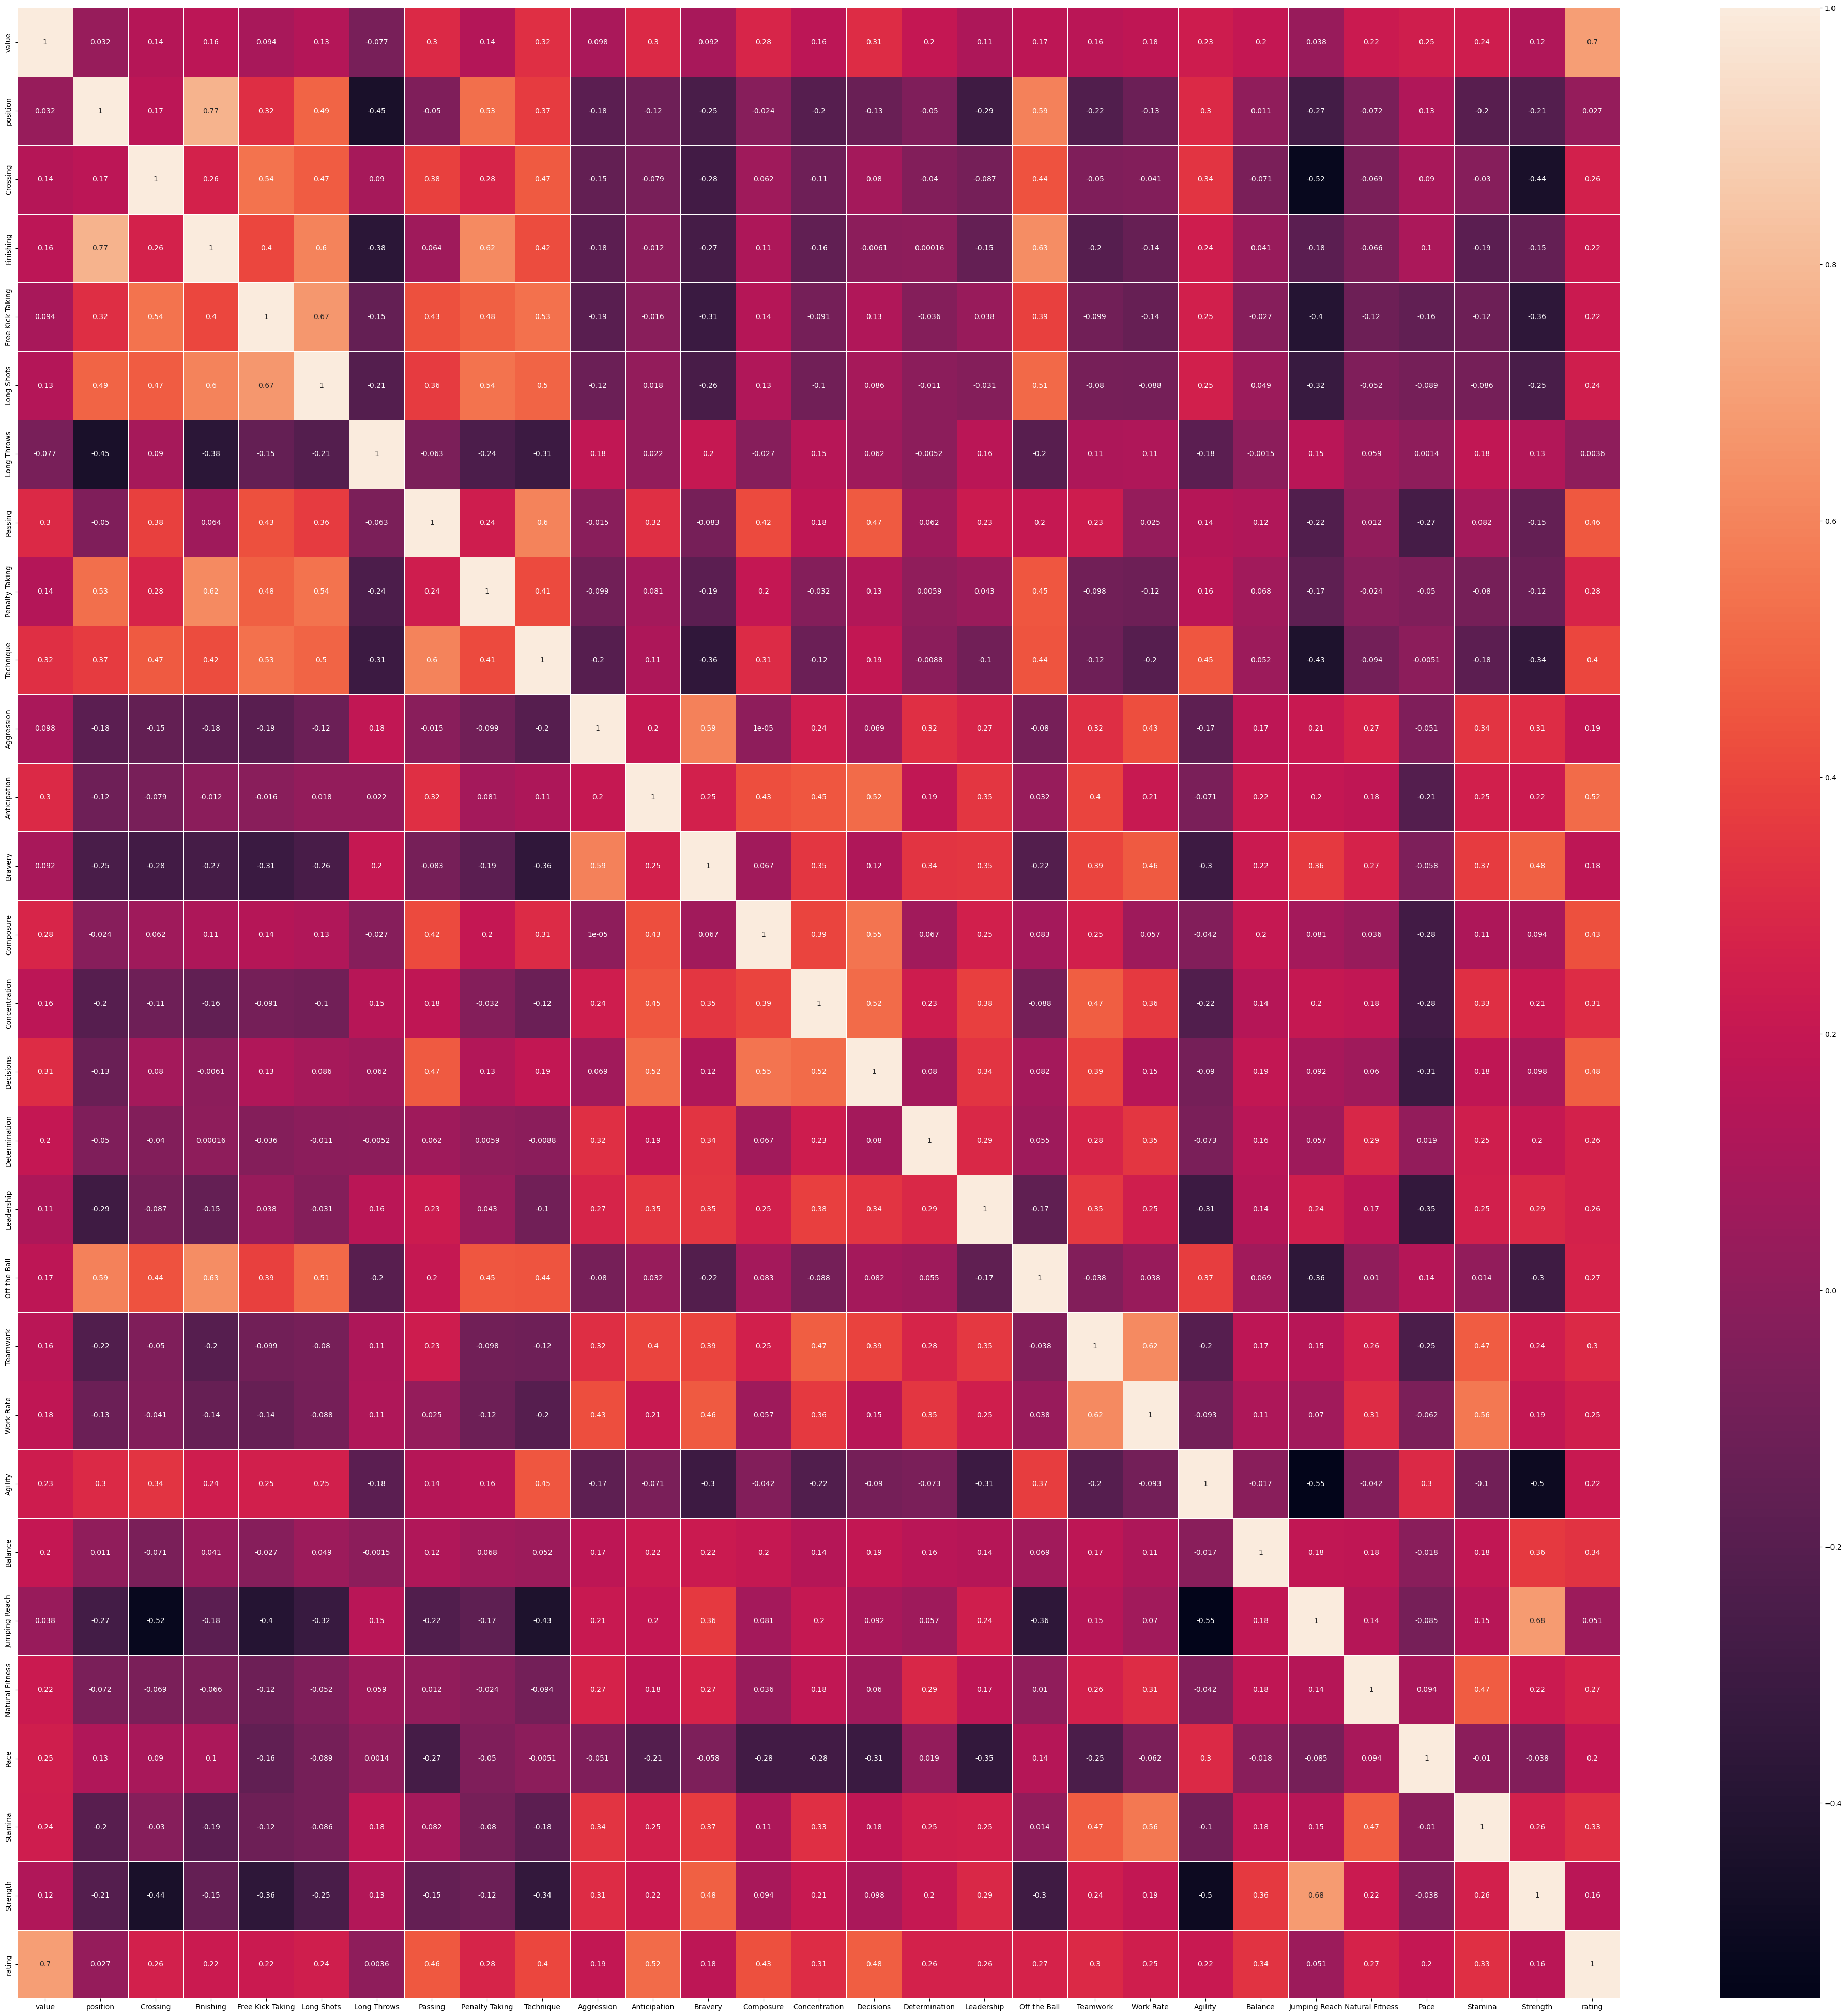

In [499]:
data_corr=dataset.drop(columns=['Acceleration','Tackling','Marking','Positioning','Vision'
                                ,'Corners','Flair','Dribbling','First Touch','Heading','Length','Weight'],axis=1)
#data_corr=dataset.drop(columns=['Length','Weight'],axis=1)

corr=data_corr.corr(method ='pearson')

fig, ax = plt.subplots(figsize=(50,50))         # Sample figsize in inches
sns.heatmap(corr, annot=True, linewidths=.5, ax=ax)

In [500]:
data_corr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1343 entries, 0 to 1342
Data columns (total 34 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   value             1343 non-null   float64 
 1   name              1343 non-null   object  
 2   position          1343 non-null   float64 
 3   Crossing          1343 non-null   int64   
 4   Finishing         1343 non-null   int64   
 5   Free Kick Taking  1343 non-null   int64   
 6   Long Shots        1343 non-null   int64   
 7   Long Throws       1343 non-null   int64   
 8   Passing           1343 non-null   int64   
 9   Penalty Taking    1343 non-null   int64   
 10  Technique         1343 non-null   int64   
 11  Aggression        1343 non-null   int64   
 12  Anticipation      1343 non-null   int64   
 13  Bravery           1343 non-null   int64   
 14  Composure         1343 non-null   int64   
 15  Concentration     1343 non-null   int64   
 16  Decisions         1343 n

Now we would like to make our data numerical for the machine learning process

In [501]:
from sklearn import preprocessing 

#make an instance of Label Encoder
label_encoder = preprocessing.LabelEncoder()
data_corr['Foot'] = label_encoder.fit_transform(data_corr['Foot'])
data_corr.head()

,value,name,position,Crossing,Finishing,Free Kick Taking,Long Shots,Long Throws,Passing,Penalty Taking,...,Jumping Reach,Natural Fitness,Pace,Stamina,Strength,rating,Foot,age_binned,nations_binned,clubs_binned
0,90.0,Harry Kane,5.0,15,19,10,15,6,18,20,...,13,16,14,16,15,92,0,5,3,3
1,85.0,Rafael Leão,4.0,15,15,6,13,6,15,12,...,14,15,16,11,14,82,2,3,3,3
2,80.0,Christopher Nkunku,4.0,13,14,14,13,7,16,11,...,9,14,15,16,11,79,2,4,3,3
3,80.0,Mohamed Salah,4.0,14,17,12,13,6,15,17,...,8,17,18,15,15,93,1,5,1,3
4,75.0,Luis Díaz,4.0,12,15,10,13,4,14,5,...,10,15,16,13,10,83,2,4,2,3


We will turn categorical columns into dummy columns

In [502]:
data_corr = pd.get_dummies(data_corr,columns=['age_binned', 'nations_binned', 'clubs_binned','position'])
data_train=data_corr.drop(columns='name',axis=1).copy()
data_copy=data_train.copy()

We will normalize our data

In [503]:
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result
data_train=normalize(data_train.copy())

# ML

In [504]:
from sklearn.model_selection import train_test_split 
from sklearn import linear_model, metrics, preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.feature_selection import VarianceThreshold

In [505]:
data_train

,value,Crossing,Finishing,Free Kick Taking,Long Shots,Long Throws,Passing,Penalty Taking,Technique,Aggression,...,nations_binned_2,nations_binned_3,clubs_binned_1,clubs_binned_2,clubs_binned_3,position_1.0,position_2.0,position_3.0,position_4.0,position_5.0
0,0.809524,0.800000,1.0000,0.473684,0.764706,0.294118,0.846154,1.000000,0.692308,0.4375,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.761905,0.800000,0.7500,0.263158,0.647059,0.294118,0.615385,0.578947,0.615385,0.3125,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.714286,0.666667,0.6875,0.684211,0.647059,0.352941,0.692308,0.526316,0.615385,0.6250,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.714286,0.733333,0.8750,0.578947,0.647059,0.294118,0.615385,0.842105,0.769231,0.4375,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.666667,0.600000,0.7500,0.473684,0.647059,0.176471,0.538462,0.210526,0.846154,0.5625,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1338,0.000000,0.266667,0.4375,0.315789,0.294118,0.411765,0.307692,0.315789,0.230769,0.6250,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1339,0.000000,0.400000,0.1875,0.052632,0.529412,0.411765,0.538462,0.368421,0.538462,0.3125,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1340,0.000000,0.600000,0.4375,0.578947,0.588235,0.647059,0.384615,0.631579,0.461538,0.5625,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1341,0.000000,0.533333,0.3125,0.315789,0.411765,0.529412,0.461538,0.368421,0.384615,0.3750,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [506]:
y=data_train.iloc[:,0:1]
X=data_train.iloc[:,1:]


## Linear Regression

In [507]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.13, random_state=49)
linermod =linear_model.LinearRegression()
linermod.fit(X_train, y_train) #This is where the training is taking place
y_pred_linermod = linermod.predict(X_test) #Making predictions to test the model on test data
print('Linear Regression Train accuracy %s' % linermod.score(X_train, y_train)) #Train accuracy
print('Linear Regression Test accuracy %s' % linermod.score(X_test, y_test))

Linear Regression Train accuracy 0.6864404278557785
Linear Regression Test accuracy 0.6875301998162904


Using a normal linear regression we got a result that does not satisfy us

## RandomForestRegressor

In [508]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

In [509]:
from sklearn.ensemble import RandomForestRegressor

In [510]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.15, random_state=60)
model=RandomForestRegressor(n_jobs=-1,min_samples_leaf=2,max_depth=6)
estimators=np.arange(5,150,5)
score=[]
train=[]

max_n_est=-1
max_score=-1
for n in estimators:
    model.set_params(n_estimators=n)
    model.fit(X_train,y_train.values.ravel())
    score.append(model.score(X_test,y_test))
    train.append(model.score(X_train,y_train))
    curr_score=model.score(X_test,y_test)
    
    if curr_score>max_score:
        max_n_est=n
        max_score=curr_score

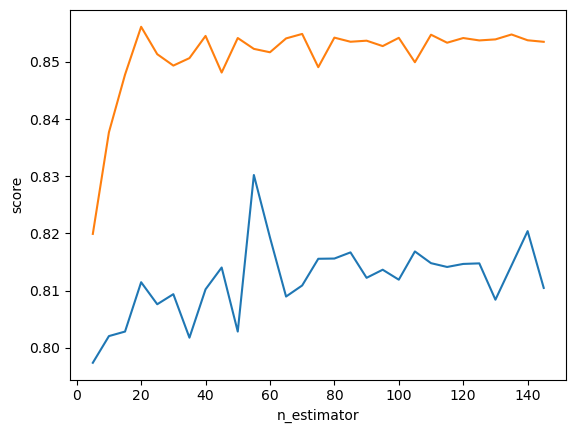

In [511]:
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators,score)
plt.plot(estimators,train)

In [513]:
df_=pd.DataFrame({'score':score,'train':train})
df_.loc[df_['score']==max_score]

,score,train
10,0.830224,0.852262


In [514]:
max_score

0.8302236022679237

In [515]:
max_n_est

55

In [516]:
print('Linear RandomForestRegressor Train accuracy %s' % model.score(X_train, y_train)) #Train accuracy
print('Linear RandomForestRegressor Test accuracy %s' % model.score(X_test, y_test))

Linear RandomForestRegressor Train accuracy 0.8534951290931557
Linear RandomForestRegressor Test accuracy 0.8104890815173956


We got the best result with the help of the model we built with the help of RandomForestRegressor

In [517]:
from sklearn.metrics import r2_score

In [518]:
y_pred=model.predict(X_test)
r2_score(y_pred, y_test)

0.7311244316727231

# Summary

This code snippet has been taken

* https://github.com/noambassat/Male-programmers-from-Mars-and-female-engineers-from-Venus/blob/main/Modeling%20Data.ipynb
* https://mljar.com/blog/feature-importance-in-random-forest/

In [519]:
from sklearn.inspection import permutation_importance
from matplotlib import pyplot as plt

In [520]:
model.feature_importances_

array([3.24429721e-03, 7.73757849e-03, 4.50630710e-03, 4.72471806e-03,
       7.15089463e-03, 3.35350799e-03, 6.28812871e-03, 5.10314594e-03,
       5.63032147e-03, 2.86300587e-03, 2.50996358e-03, 3.20479108e-03,
       2.16392789e-03, 2.42490923e-03, 6.98037149e-03, 5.07291798e-03,
       9.80053557e-03, 2.37007893e-03, 3.86836970e-03, 2.44960931e-03,
       4.79757635e-03, 5.34296847e-03, 1.31583031e-02, 4.75842034e-03,
       3.55434516e-03, 6.79856290e-03, 6.73792958e-01, 1.94616246e-04,
       1.35012196e-04, 2.71092285e-02, 3.05531145e-03, 2.94839809e-03,
       4.29418579e-02, 9.93034032e-02, 2.09106575e-04, 5.40232407e-04,
       6.38030179e-04, 7.53831238e-03, 1.27131462e-03, 6.06134703e-03,
       1.25406501e-03, 4.07683378e-04, 1.66103395e-03, 5.52401281e-04,
       5.28131378e-04])

In [521]:
#pip install shap
import shap

In [522]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(data_train)
feature_names=pca.components_

<BarContainer object of 45 artists>

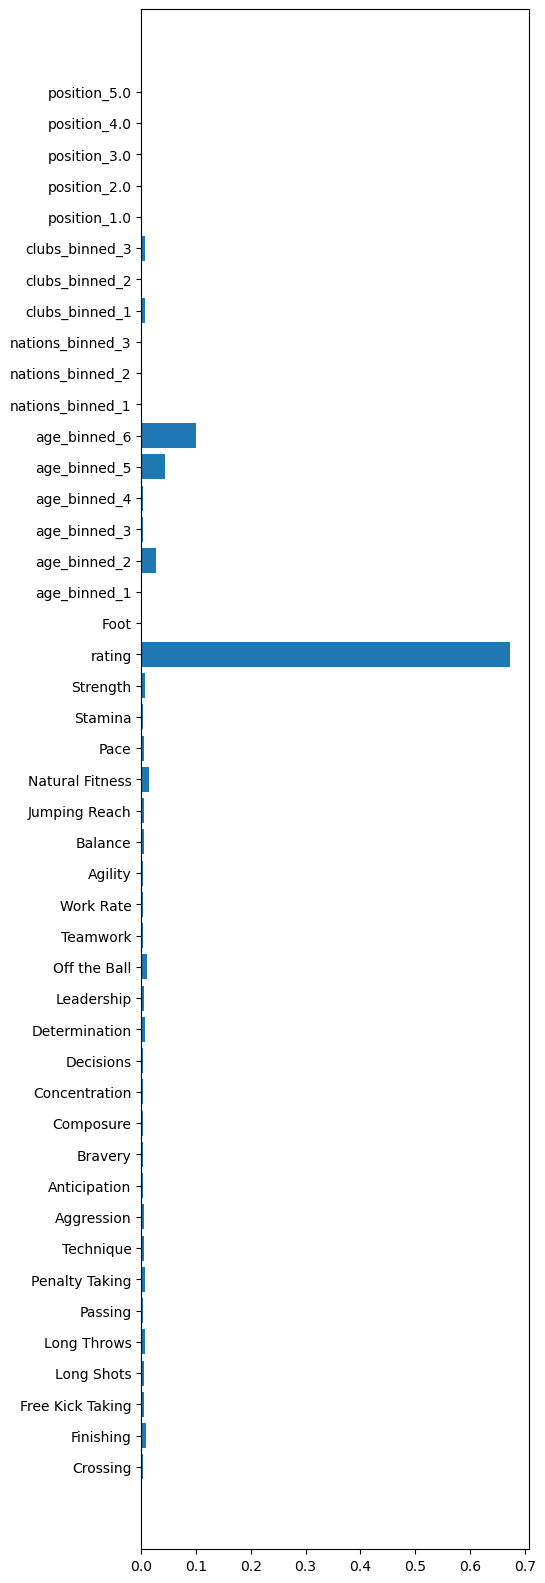

In [523]:
fig, ax = plt.subplots(figsize=(5,20))
plt.barh(X.columns, model.feature_importances_)

Text(0.5, 0, 'Random Forest Feature Importance')

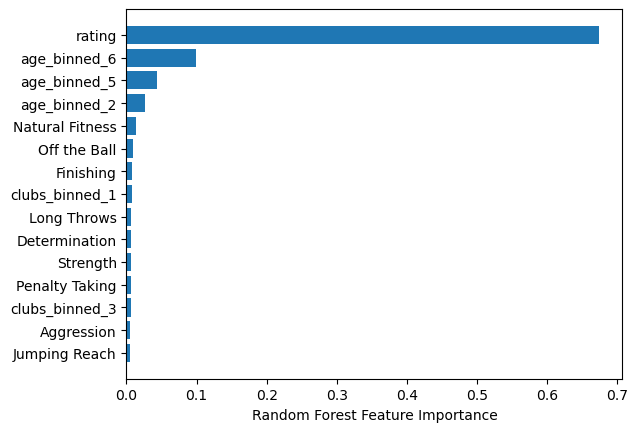

In [524]:
sorted_idx = model.feature_importances_.argsort(axis=-1)[30:]
plt.barh(X.columns[sorted_idx,], model.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")


You can see which factors mainly affect the price.
And these are the factors that our model uses for the prediction

Text(0.5, 0, 'Random Forest Feature Importance')

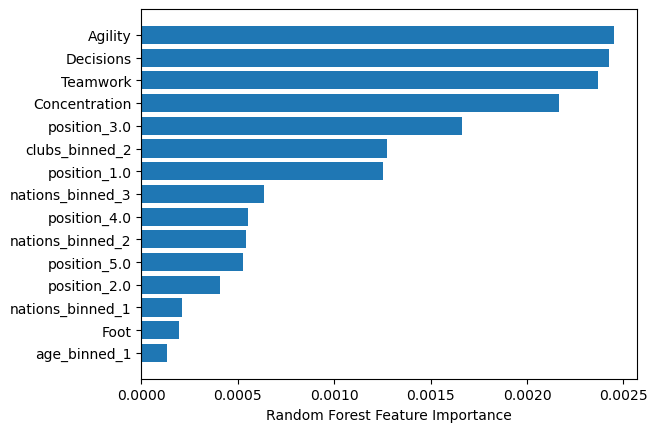

In [525]:
sorted_idx = model.feature_importances_.argsort(axis=-1)[0:15]
plt.barh(X.columns[sorted_idx,], model.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

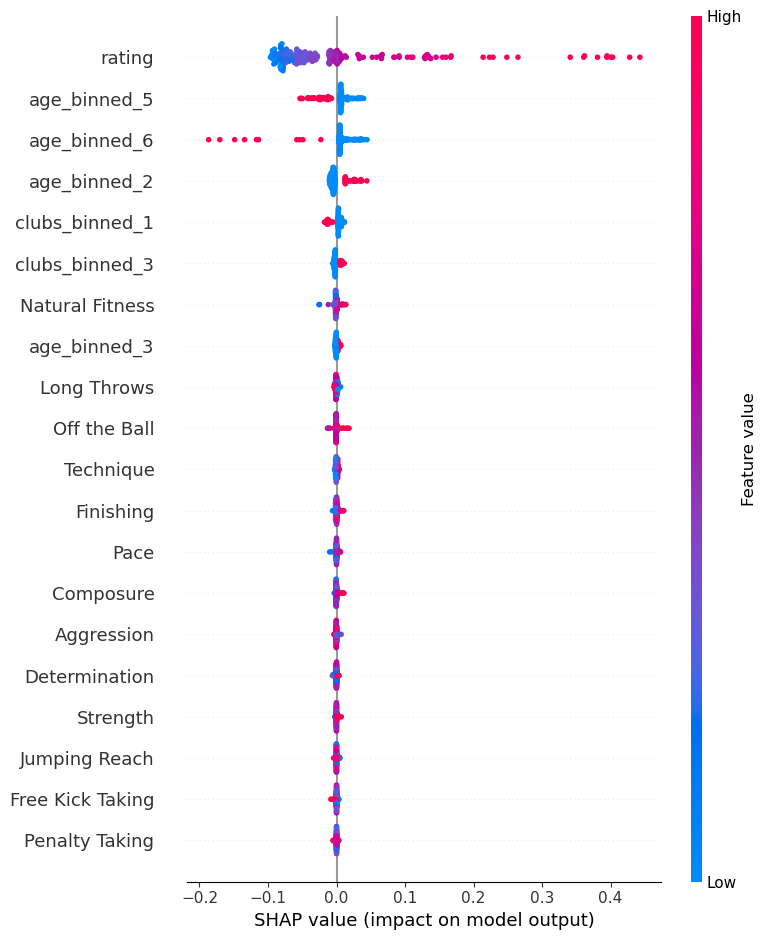

In [526]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)